# TravelTide Company
- EDA & cleaning on Sessions_level_table and creating a user_lever_table
- Used SQLite for this section and the next as was easier to setup in VS code


In [7]:
import pandas as pd

sessions_level_df = pd.read_csv("/Users/biancaniemann/Documents/VS Code/Practice Python/Travel Tide Project/TravelTide_Final_Files/sessions_level_final_table.csv")

In [8]:
!pip install -q pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())



# Python Analysis



* Ran checks for any inconstencies or errors in the final sessions table
* Fixed the columns that should be DATETIME
* Added a check in and departure period so that it is easy to see if user has prefered time of day to travel (Morning, Afternoon, Evening or nigh)
* Downloaded the updated file for record purposes
* Added a column for the full hotel cost (rate * rooms * nights)

In [4]:
sessions_level_df.head()

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,hotel_city,mths_as_customer,customer_age,cost_per_seat,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool
0,521642-b77682e95aa946adb4d0f5feadd70418,521642,NaN,2023-04-28 01:32:00,2023-04-28 01:32:58,False,False,NaN,NaN,False,...,NaN,6.0,58.0,NaN,58.0,NaN,NaN,NaN,0,0
1,573378-14e4aa636bfa4b2eaf2bbdf37c246412,573378,NaN,2023-04-28 19:42:00,2023-04-28 19:42:47,False,False,NaN,NaN,False,...,NaN,5.0,44.0,NaN,47.0,NaN,NaN,NaN,0,0
2,585965-1148fb57fc2e4c6d90b29ba0c0d7c6ca,585965,NaN,2023-04-28 19:54:00,2023-04-28 19:54:45,False,False,NaN,NaN,False,...,NaN,5.0,48.0,NaN,45.0,NaN,NaN,NaN,0,0
3,521187-420a994d8cd44b449b95611d80f3a45b,521187,NaN,2023-04-29 14:24:00,2023-04-29 14:24:22,False,False,NaN,NaN,False,...,NaN,6.0,73.0,NaN,22.0,NaN,NaN,NaN,0,0
4,600304-9b55b559a9f141e18d3352e25973d0e5,600304,NaN,2023-04-29 11:35:00,2023-04-29 11:36:10,False,False,NaN,NaN,False,...,NaN,5.0,56.0,NaN,70.0,NaN,NaN,NaN,0,0


In [5]:
sessions_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   session_id                    49211 non-null  object 
 1   user_id                       49211 non-null  int64  
 2   trip_id                       16702 non-null  object 
 3   session_start                 49211 non-null  object 
 4   session_end                   49211 non-null  object 
 5   flight_discount               49211 non-null  bool   
 6   hotel_discount                49211 non-null  bool   
 7   flight_discount_amount        8282 non-null   float64
 8   hotel_discount_amount         6205 non-null   float64
 9   flight_booked                 49211 non-null  bool   
 10  hotel_booked                  49211 non-null  bool   
 11  page_clicks                   49211 non-null  int64  
 12  cancellation                  49211 non-null  bool   
 13  b

In [114]:
numeric_cols = sessions_level_df.select_dtypes(include=['int64', 'float64'])

numeric_cols.describe()

,user_id,flight_discount_amount,hotel_discount_amount,page_clicks,home_airport_lat,home_airport_lon,hotel_per_room_usd,seats,checked_bags,destination_airport_lat,...,rooms_new,mths_as_customer,customer_age,cost_per_seat,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool
count,49211.000000,8282.000000,6205.000000,49211.000000,49211.000000,49211.000000,14726.000000,14270.000000,14270.000000,14270.000000,...,14726.000000,49211.000000,49211.000000,14270.000000,49211.000000,14270.000000,1970.000000,1929.000000,49211.000000,49211.000000
mean,545282.694946,0.139864,0.112192,17.588791,38.427222,-94.183762,177.937390,1.215207,0.592922,38.610024,...,1.194554,5.821280,40.916157,404.000292,187.252329,19.121374,71.318668,20.275946,0.277418,0.289976
std,64640.047648,0.083914,0.062119,21.495987,6.185962,18.065868,118.334569,0.585891,0.677641,6.949739,...,0.499344,1.184256,12.041831,347.884069,660.250156,49.992604,141.398872,18.734631,0.447729,0.453755
min,23557.000000,0.050000,0.050000,1.000000,21.316000,-157.927000,17.000000,1.000000,0.000000,-37.008000,...,1.000000,2.000000,16.000000,2.410000,6.000000,0.000000,0.453500,1.200000,0.000000,0.000000
25%,517119.000000,0.100000,0.050000,6.000000,33.818000,-112.383000,99.000000,1.000000,0.000000,33.942000,...,1.000000,5.000000,34.000000,183.017500,45.000000,6.000000,21.467750,8.400000,0.000000,0.000000
50%,540308.000000,0.100000,0.100000,13.000000,39.103000,-90.035000,148.000000,1.000000,1.000000,39.872000,...,1.000000,6.000000,41.000000,353.705000,96.000000,8.000000,42.798750,14.800000,0.000000,0.000000
75%,573922.000000,0.200000,0.150000,22.000000,42.238000,-79.370000,222.000000,1.000000,1.000000,42.409000,...,1.000000,6.000000,48.000000,540.020000,162.000000,10.000000,78.060375,25.300000,1.000000,1.000000
max,844489.000000,0.600000,0.450000,566.000000,61.251000,-63.499000,1376.000000,8.000000,8.000000,55.972000,...,4.000000,24.000000,88.000000,3071.695000,7200.000000,365.000000,2947.590000,173.400000,1.000000,1.000000


In [115]:
sessions_level_df.shape

(49211, 52)

In [6]:
sessions_level_df.isnull().sum()

session_id                          0
user_id                             0
trip_id                         32509
session_start                       0
session_end                         0
flight_discount                     0
hotel_discount                      0
flight_discount_amount          40929
hotel_discount_amount           43006
flight_booked                       0
hotel_booked                        0
page_clicks                         0
cancellation                        0
birthdate                           0
gender                              0
married                             0
has_children                        0
home_country                        0
home_city                           0
home_airport                        0
home_airport_lat                    0
home_airport_lon                    0
sign_up_date                        0
check_in_time                   34485
check_out_time                  34485
hotel_per_room_usd              34485
origin_airpo

In [117]:
sessions_level_df.duplicated().sum()

np.int64(0)

In [10]:
# Correct date_time columns
sessions_level_df['session_start'] = pd.to_datetime(sessions_level_df['session_start'])
sessions_level_df['departure_time'] = pd.to_datetime(sessions_level_df['departure_time'])
sessions_level_df['return_time'] = pd.to_datetime(sessions_level_df['return_time'])
sessions_level_df['check_out_time'] = pd.to_datetime(sessions_level_df['check_out_time'])


In [11]:
# Adjust sessions level table so that check in time is in datetime format and no longer an object

sessions_level_df['check_in_time'] = pd.to_datetime(sessions_level_df['check_in_time'])

# Added a column called check_in_period which shows the period of the day the user checked in, incase want to use info later

def time_of_day(dt):
    hour = dt.hour
    if 0 <= hour <= 4:
        return 'morning'   
    elif 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 22:
        return 'evening'
    elif 23 <= hour <= 24:
        return 'evening'
    else:
        return 'No Check_in'

sessions_level_df['check_in_period'] = sessions_level_df['check_in_time'].apply(time_of_day)

In [12]:
# Check the info on users a check_in time works

filtered_df = sessions_level_df[sessions_level_df['check_in_time'].notnull()]
filtered_df.head()

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,mths_as_customer,customer_age,cost_per_seat,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool,check_in_period
117,570279-7d86b66f8f0b468c90d9553291a4a281,570279,570279-c48e05a90f9c44e8beb667ba9cc1f8a0,2023-05-19 19:32:00,2023-05-19 19:34:50,False,False,NaN,NaN,True,...,5.0,24.0,91.29,170.0,7.0,NaN,NaN,1,1,morning
402,541084-912b0968a57647b9955d46f660febd07,541084,541084-2855d56d85854717a7eacf9a63dce35f,2023-07-11 05:27:00,2023-07-11 05:28:30,True,False,0.2,NaN,False,...,6.0,51.0,NaN,90.0,NaN,NaN,NaN,0,0,morning
469,512201-c703668166734621b079fc8a366db203,512201,512201-d198cb30dbe945a58808812558288792,2023-01-05 15:20:00,2023-01-05 15:22:34,False,True,NaN,0.1,True,...,6.0,51.0,781.52,154.0,9.0,NaN,17.1,1,1,evening
500,517491-49ed255542d142c4b2b6b54c20201e36,517491,517491-f17c9a923a054db2955c3f56a7d8486e,2023-01-08 15:23:00,2023-01-08 15:25:44,False,False,NaN,NaN,True,...,6.0,55.0,155.67,164.0,5.0,NaN,NaN,1,1,morning
731,488865-be40c5dcccd44022bd701f93ed83c929,488865,488865-1154619ac9b34950b501ead668e4e825,2023-01-25 15:56:00,2023-01-25 15:58:19,False,False,NaN,NaN,True,...,7.0,35.0,350.46,139.0,11.0,NaN,NaN,1,1,afternoon


In [89]:
# unique users who have checked in

users_with_checkin = sessions_level_df[sessions_level_df['check_in_time'].notnull()]['user_id'].nunique()
print(users_with_checkin)

5402


In [14]:
# Filter out rows where check_in_period is 'No Check-in'
filtered_df = sessions_level_df[sessions_level_df['check_in_period'] != 'No Check_in']
filtered_df.head(10)

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,base_fare_usd,distance_km,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period
117,570279-7d86b66f8f0b468c90d9553291a4a281,570279,570279-c48e05a90f9c44e8beb667ba9cc1f8a0,2023-05-19 19:32:00,2023-05-19 19:34:50,False,False,NaN,NaN,True,...,91.29,540.225123,6.0,1.0,NH Hotel,montreal,5.0,24.0,91.29,morning
402,541084-912b0968a57647b9955d46f660febd07,541084,541084-2855d56d85854717a7eacf9a63dce35f,2023-07-11 05:27:00,2023-07-11 05:28:30,True,False,0.20,NaN,False,...,NaN,NaN,7.0,1.0,Accor,jacksonville,6.0,51.0,NaN,morning
469,512201-c703668166734621b079fc8a366db203,512201,512201-d198cb30dbe945a58808812558288792,2023-01-05 15:20:00,2023-01-05 15:22:34,False,True,NaN,0.1,True,...,781.52,4271.028009,9.0,1.0,Shangri-La,new york,6.0,51.0,781.52,evening
500,517491-49ed255542d142c4b2b6b54c20201e36,517491,517491-f17c9a923a054db2955c3f56a7d8486e,2023-01-08 15:23:00,2023-01-08 15:25:44,False,False,NaN,NaN,True,...,155.67,1027.512878,3.0,1.0,Banyan Tree,fort worth,6.0,55.0,155.67,morning
731,488865-be40c5dcccd44022bd701f93ed83c929,488865,488865-1154619ac9b34950b501ead668e4e825,2023-01-25 15:56:00,2023-01-25 15:58:19,False,False,NaN,NaN,True,...,350.46,1788.929313,3.0,1.0,Crowne Plaza,dallas,7.0,35.0,350.46,afternoon
814,560978-02a809eca12d4bffbca9d0deb2eb5771,560978,560978-2d58a08a54cd4be1868835db447692f7,2023-01-29 16:55:00,2023-01-29 16:57:18,False,False,NaN,NaN,True,...,4589.44,20820.532445,16.0,1.0,Choice Hotels,singapore,6.0,17.0,2294.72,morning
1182,542012-004deaac3341435f95193d20c1db24e1,542012,542012-e368760a3dd34190ac40531d5383ec19,2023-02-22 06:22:00,2023-02-22 06:27:42,True,False,0.05,NaN,True,...,294.61,1668.191612,2.0,1.0,NH Hotel,denver,6.0,45.0,294.61,evening
1288,283325-eed61ca33de3458a9134d3d743f17722,283325,283325-dd763c2d6d334b3790266b500393438e,2023-02-28 01:28:00,2023-02-28 01:32:07,True,False,0.10,NaN,True,...,453.27,2838.442947,5.0,1.0,Wyndham,quebec,11.0,50.0,453.27,evening
1810,530801-3f8db46473804f22a1bed8f249cc07e0,530801,530801-c1984101944049c3981bca433393ae12,2023-04-19 15:57:00,2023-04-19 16:00:06,False,False,NaN,NaN,True,...,620.71,3318.487472,3.0,1.0,Banyan Tree,los angeles,6.0,43.0,620.71,evening
2147,598265-7d2bc9196e144e85b0e3221494d51447,598265,598265-7fb14041df6140878ab15f133afa8152,2023-06-16 19:44:00,2023-06-16 19:46:34,False,False,NaN,NaN,True,...,101.51,570.826834,2.0,1.0,Wyndham,toronto,5.0,45.0,101.51,morning


In [13]:
# Added a column called departure_period which shows the period of the day the users flight departed

def time_of_day(dt):
    hour = dt.hour
    if 0 <= hour <= 4:
        return 'morning'   
    elif 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 22:
        return 'evening'
    elif 23 <= hour <= 24:
        return 'evening'
    else:
        return 'No Flight'

sessions_level_df['departure_period'] = sessions_level_df['departure_time'].apply(time_of_day)

In [122]:
# Check the info on users a check_in time works

filtered_df = sessions_level_df[sessions_level_df['flight_booked'].notnull()]
filtered_df.head()

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,customer_age,cost_per_seat,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool,check_in_period,departure_period
0,521642-b77682e95aa946adb4d0f5feadd70418,521642,NaN,2023-04-28 01:32:00,2023-04-28 01:32:58,False,False,NaN,NaN,False,...,58.0,NaN,58.0,NaN,NaN,NaN,0,0,No Check_in,No Flight
1,573378-14e4aa636bfa4b2eaf2bbdf37c246412,573378,NaN,2023-04-28 19:42:00,2023-04-28 19:42:47,False,False,NaN,NaN,False,...,44.0,NaN,47.0,NaN,NaN,NaN,0,0,No Check_in,No Flight
2,585965-1148fb57fc2e4c6d90b29ba0c0d7c6ca,585965,NaN,2023-04-28 19:54:00,2023-04-28 19:54:45,False,False,NaN,NaN,False,...,48.0,NaN,45.0,NaN,NaN,NaN,0,0,No Check_in,No Flight
3,521187-420a994d8cd44b449b95611d80f3a45b,521187,NaN,2023-04-29 14:24:00,2023-04-29 14:24:22,False,False,NaN,NaN,False,...,73.0,NaN,22.0,NaN,NaN,NaN,0,0,No Check_in,No Flight
4,600304-9b55b559a9f141e18d3352e25973d0e5,600304,NaN,2023-04-29 11:35:00,2023-04-29 11:36:10,False,False,NaN,NaN,False,...,56.0,NaN,70.0,NaN,NaN,NaN,0,0,No Check_in,No Flight


In [91]:
# Filter out rows where departure_period is 'No Flight'
filtered_df = sessions_level_df[(sessions_level_df['departure_period'] == 'No Flight') &(sessions_level_df['check_in_period'] != 'No Check_in')]  
filtered_df.head(10)

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,distance_km,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period
402,541084-912b0968a57647b9955d46f660febd07,541084,541084-2855d56d85854717a7eacf9a63dce35f,2023-07-11 05:27:00,2023-07-11 05:28:30,True,False,0.20,NaN,False,...,NaN,7.0,1.0,Accor,jacksonville,6.0,51.0,NaN,morning,No Flight
3462,517064-4f4b386a33d941f18b5731e1de5a19c3,517064,517064-9bc5c36e57494806880aefb0ecbef8ba,2023-03-12 19:37:00,2023-03-12 19:38:06,True,False,0.05,NaN,False,...,NaN,3.0,1.0,InterContinental,ottawa,6.0,17.0,NaN,morning,No Flight
4575,526913-96a4b126dcd045aab9e8caeeb0894fab,526913,526913-3e6c5832a348475b8866e8b15b350d42,2023-01-12 18:02:00,2023-01-12 18:04:35,False,False,NaN,NaN,False,...,NaN,3.0,1.0,Choice Hotels,new york,6.0,55.0,NaN,morning,No Flight
5749,519515-4c6c5271c29c4d9bb3bb6cb8072be752,519515,519515-2ebe3de91e9f424db2209f807900e5f4,2023-03-16 17:43:00,2023-03-16 17:44:55,False,False,NaN,NaN,False,...,NaN,17.0,2.0,Marriott,los angeles,6.0,50.0,NaN,morning,No Flight
6544,499810-6dfbd1653c0f41f7b849aa1fe664c1eb,499810,499810-62b96759b2f543b18048321565b0fbe9,2023-06-28 13:12:00,2023-06-28 13:13:16,False,False,NaN,NaN,False,...,NaN,11.0,1.0,Wyndham,new york,7.0,45.0,NaN,morning,No Flight
7851,502210-5259596e4ccd46b18fe379d5d006f6d1,502210,502210-966236123c5345d4b2e0a15081240f01,2023-03-26 12:57:00,2023-03-26 12:59:25,False,False,NaN,NaN,False,...,NaN,6.0,2.0,NH Hotel,los angeles,7.0,42.0,NaN,morning,No Flight
9257,545981-4be2bd54f4c14cf7b4ea3f32196e144d,545981,545981-7636cf6890164fd5a62a2603bcdd8c18,2023-02-16 07:36:00,2023-02-16 07:39:42.000000,False,False,NaN,NaN,False,...,NaN,6.0,1.0,Banyan Tree,houston,6.0,35.0,NaN,morning,No Flight
10571,118043-850d830bbce54f3f9e9d3c6e6b8cfd3d,118043,118043-3148ad84821c481f81764ed8643adbbf,2023-07-15 02:05:00,2023-07-15 02:07:00.000000,True,True,0.20,0.05,False,...,NaN,8.0,1.0,Fairmont,new york,16.0,51.0,NaN,morning,No Flight
11159,520311-dbf23543264c45fa9c7f97091565f7bc,520311,520311-2bf282f4830041af90c802612a4b5482,2023-02-05 14:08:00,2023-02-05 14:09:15,False,False,NaN,NaN,False,...,NaN,12.0,1.0,Accor,new york,6.0,47.0,NaN,morning,No Flight
11217,532279-1a179e2189424b53bb56f8956d7b6ba5,532279,532279-e8348444247b469eb9bc915beffff053,2023-02-08 13:45:00,2023-02-08 13:47:34,True,False,0.15,NaN,False,...,NaN,12.0,2.0,NH Hotel,new york,6.0,16.0,NaN,morning,No Flight


In [19]:
sessions_level_df.shape


(49211, 48)

In [93]:
sessions_level_df.dtypes

session_id                         object
user_id                             int64
trip_id                            object
session_start              datetime64[ns]
session_end                        object
flight_discount                      bool
hotel_discount                       bool
flight_discount_amount            float64
hotel_discount_amount             float64
flight_booked                        bool
hotel_booked                         bool
page_clicks                         int64
cancellation                         bool
birthdate                          object
gender                             object
married                              bool
has_children                         bool
home_country                       object
home_city                          object
home_airport                       object
home_airport_lat                  float64
home_airport_lon                  float64
sign_up_date                       object
check_in_time              datetim

In [ ]:
# Originally was thinking of adding the haversine in the python section but did it in SQL so no longer needed here, just kept code for record purposes

# install packeages to calculate the distance between home airport and destinations airport (using haversine)

#!pip install -q utils
#!pip install -q haversine
#from haversine import haversine, Unit

# Add in the distance travelled column using haversine function

#sessions_level_df['distance_km'] = sessions_level_df.apply(
 #   lambda row: haversine(
 #       (row['home_airport_lat'], row['home_airport_lon']),
 #       (row['destination_airport_lat'], row['destination_airport_lon']),
 #       unit=Unit.KILOMETERS
 #   ),
 #   axis=1
#)

In [ ]:
# Add in the full hotel cost - cant do in orginal SQL as the columns dont exist yet (the rate we have is per room per night so multiplied by both to get full cost)

sessions_level_df['hotel_total_cost'] = sessions_level_df['hotel_per_room_usd']*sessions_level_df['nights_new']*sessions_level_df['rooms_new']
sessions_level_df

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,cost_per_seat,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool,check_in_period,departure_period,hotel_total_cost
0,521642-b77682e95aa946adb4d0f5feadd70418,521642,NaN,2023-04-28 01:32:00,2023-04-28 01:32:58,False,False,NaN,NaN,False,...,NaN,58.0,NaN,NaN,NaN,0,0,No Check_in,No Flight,NaN
1,573378-14e4aa636bfa4b2eaf2bbdf37c246412,573378,NaN,2023-04-28 19:42:00,2023-04-28 19:42:47,False,False,NaN,NaN,False,...,NaN,47.0,NaN,NaN,NaN,0,0,No Check_in,No Flight,NaN
2,585965-1148fb57fc2e4c6d90b29ba0c0d7c6ca,585965,NaN,2023-04-28 19:54:00,2023-04-28 19:54:45,False,False,NaN,NaN,False,...,NaN,45.0,NaN,NaN,NaN,0,0,No Check_in,No Flight,NaN
3,521187-420a994d8cd44b449b95611d80f3a45b,521187,NaN,2023-04-29 14:24:00,2023-04-29 14:24:22,False,False,NaN,NaN,False,...,NaN,22.0,NaN,NaN,NaN,0,0,No Check_in,No Flight,NaN
4,600304-9b55b559a9f141e18d3352e25973d0e5,600304,NaN,2023-04-29 11:35:00,2023-04-29 11:36:10,False,False,NaN,NaN,False,...,NaN,70.0,NaN,NaN,NaN,0,0,No Check_in,No Flight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,438551-066567f44c564b0983da50eaefb7d6b6,438551,438551-1a9fcfc16bd8487ea23e820957d23279,2023-03-26 21:01:00,2023-03-26 21:03:37.000000,False,False,NaN,NaN,True,...,2274.326667,157.0,197.0,NaN,NaN,1,1,morning,morning,5577.0
49207,550426-4f92fcb88ebd4854ba998a60ab70500a,550426,550426-4ee1b21f6b0148f1804e0536278de146,2023-03-26 14:45:00,2023-03-26 14:50:58.000000,False,False,NaN,NaN,True,...,63.960000,358.0,7.0,NaN,NaN,1,1,morning,morning,3070.0
49208,610793-d7c5924dcfac43e0b19211370af6c794,610793,610793-b0ad9fd46383491aa91f23c002af6300,2023-03-28 19:27:00,2023-03-28 19:29:15.000000,False,False,NaN,NaN,True,...,402.160000,135.0,6.0,NaN,NaN,1,1,afternoon,morning,792.0
49209,503928-df055d6f1b804da4a47ab8ddd72c2724,503928,503928-163e7cd17a4d46b3b37c17b71a110a02,2023-04-11 16:20:00,2023-04-11 16:22:50.000000,False,False,NaN,NaN,True,...,362.410000,170.0,5.0,NaN,NaN,1,1,evening,afternoon,444.0


In [14]:
unique_users = sessions_level_df['user_id'].nunique()
unique_users

5998

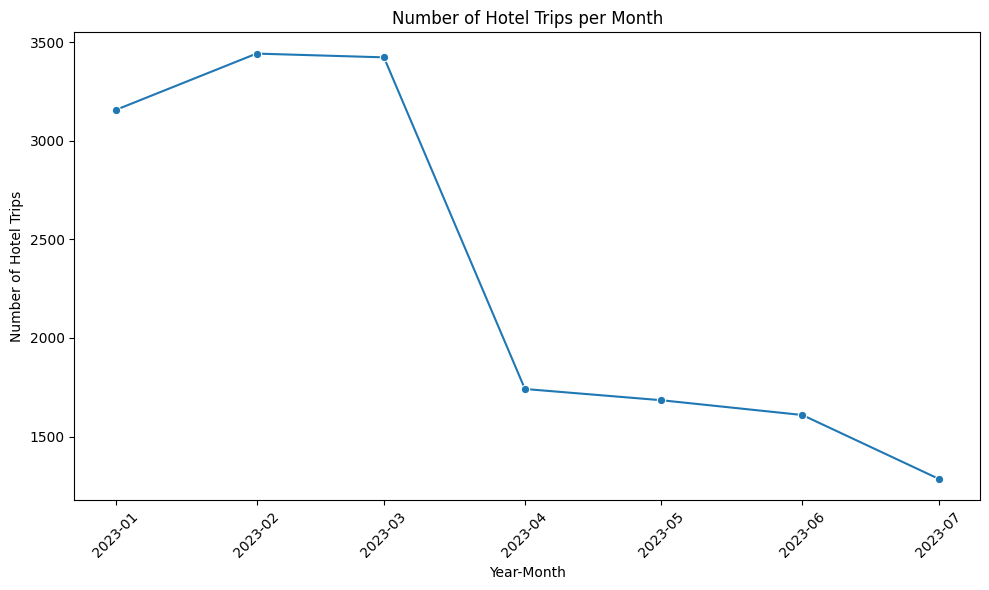

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a year-month column and make it string
sessions_level_df['year_month'] = sessions_level_df['session_start'].dt.to_period('M').astype(str)

# Group by the months and show the total trips per month
monthly_counts = sessions_level_df.groupby('year_month')['trip_id'].nunique().reset_index()

# Rename columns for clarity
monthly_counts.columns = ['year_month', 'Distinct Trips']

# Convert year_month to datetime for filtering and sorting
monthly_counts['year_month'] = pd.to_datetime(monthly_counts['year_month'])

# Filter to include only up to July 2023
cutoff_date = pd.to_datetime('2023-07')
monthly_counts = monthly_counts[monthly_counts['year_month'] <= cutoff_date]

# Plots the chart with Seaborn and Matplotlib to see bookings per month and year over all the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='year_month', y='Distinct Trips', marker='o')
plt.xticks(rotation=45)
plt.title('Number of Hotel Trips per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Hotel Trips')
plt.tight_layout()
plt.show()

### Created a table excluding cancellations and original bookings to run some aggregations and check I balance back in SQL

In [36]:
## Remove the cancelled trips and associated flights for that cancelled trip

cancelled_trip_ids = sessions_level_df[sessions_level_df['cancellation'] == True]['trip_id'].unique()


In [ ]:
## Count of cancelled trips

cancelled_trip_ids_total = sessions_level_df[sessions_level_df['cancellation'] == True]['trip_id'].nunique()
cancelled_trip_ids_total

610

In [24]:
# Need to filter out the above rows (~ is the same as NOT so using rows that do not have the trip id in above table)
# cancellations_removed_df is now latest table to use

cancellations_removed_df = sessions_level_df[~sessions_level_df['trip_id'].isin(cancelled_trip_ids)]
cancellations_removed_df.head()

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,distance_km,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period
0,521642-b77682e95aa946adb4d0f5feadd70418,521642,NaN,2023-04-28 01:32:00,2023-04-28 01:32:58,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,6.0,58.0,NaN,No Check_in,No Flight
1,573378-14e4aa636bfa4b2eaf2bbdf37c246412,573378,NaN,2023-04-28 19:42:00,2023-04-28 19:42:47,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,5.0,44.0,NaN,No Check_in,No Flight
2,585965-1148fb57fc2e4c6d90b29ba0c0d7c6ca,585965,NaN,2023-04-28 19:54:00,2023-04-28 19:54:45,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,5.0,48.0,NaN,No Check_in,No Flight
3,521187-420a994d8cd44b449b95611d80f3a45b,521187,NaN,2023-04-29 14:24:00,2023-04-29 14:24:22,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,6.0,73.0,NaN,No Check_in,No Flight
4,600304-9b55b559a9f141e18d3352e25973d0e5,600304,NaN,2023-04-29 11:35:00,2023-04-29 11:36:10,False,False,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,5.0,56.0,NaN,No Check_in,No Flight


In [94]:
# check the rows balance back to the SQL rows total of 47998
cancellations_removed_df.shape

(47998, 48)

In [40]:
cancellations_removed_df

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period,hotel_total_cost,ADS,scaled_ADS
0,375729-8f582c67a0d442e5a35588180b0a7cc2,375729,NaN,2023-02-06 22:58:00,2023-02-06 22:59:30,True,False,0.05,NaN,False,...,NaN,NaN,9.0,52.0,NaN,No Check_in,No Flight,NaN,NaN,NaN
1,490576-4fdd6aeb2e1d4e1b9f3d29b47900a569,490576,NaN,2023-02-06 11:48:00,2023-02-06 11:48:53,False,False,NaN,NaN,False,...,NaN,NaN,7.0,56.0,NaN,No Check_in,No Flight,NaN,NaN,NaN
2,529704-4998f918c88045da821ceb02ab7c10a5,529704,NaN,2023-02-06 06:10:00,2023-02-06 06:10:08,False,False,NaN,NaN,False,...,NaN,NaN,6.0,66.0,NaN,No Check_in,No Flight,NaN,NaN,NaN
3,531931-7c79cec8c36c4dabbfbfd13a5c5d4440,531931,NaN,2023-02-06 19:47:00,2023-02-06 19:47:15,False,True,NaN,0.1,False,...,NaN,NaN,6.0,39.0,NaN,No Check_in,No Flight,NaN,NaN,NaN
4,531971-8c72fd1f7ed441f6be80b53fc7bc3bf8,531971,NaN,2023-02-06 18:58:00,2023-02-06 18:59:52,False,False,NaN,NaN,False,...,NaN,NaN,6.0,58.0,NaN,No Check_in,No Flight,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49204,406210-aa8ddc159f934ca48b8211436e95aa6a,406210,406210-6c29806425804fe2b4da095371e25cfb,2023-07-19 16:39:00,2023-07-19 16:40:59.000000,False,False,NaN,NaN,True,...,InterContinental,osaka,8.0,20.0,536.61,morning,evening,1326.0,NaN,NaN
49207,523273-7f6d09984ffd4facb1482a557eb0fb7d,523273,523273-70681fe70d5c4f0293ccb987f8c4fc4b,2023-01-13 03:34:00,2023-01-13 03:36:25.000000,False,False,NaN,NaN,True,...,Fairmont,san antonio,6.0,50.0,462.18,evening,afternoon,57.0,NaN,NaN
49208,532823-969284ec22dc4fa4b42c1f694b322265,532823,532823-168ac0568a884d4a8850527b82098cb0,2023-01-19 06:39:00,2023-01-19 06:41:00.000000,False,False,NaN,NaN,True,...,Hilton,san jose,6.0,35.0,388.82,evening,afternoon,286.0,NaN,NaN
49209,472966-a27a7987341e4963ad9f578073298080,472966,472966-778844a7de0d46bba12ce251406b403f,2023-02-01 12:27:00,2023-02-01 12:30:27.000000,False,False,NaN,NaN,True,...,Fairmont,new york,7.0,36.0,644.97,afternoon,morning,107.0,NaN,NaN


In [95]:
# Run the discount_flight_proportion on the sessions level tabel in python (get same amount of 17% in SQL on all users)

discount_flight_proportion = round(cancellations_removed_df['flight_discount'].mean(),2)
discount_flight_proportion

np.float64(0.17)

In [259]:
# Run the flight_disc_average on the sessions level tabel in python (not coming back to 0.02 like SQl WHY???)

avg_flight_disc_amount = round(cancellations_removed_df['flight_discount_amount'].mean(),2)
avg_flight_disc_amount

np.float64(0.14)

In [260]:
# Calculate the ADS (balances back to SQL)

avg_dollars_saved = (cancellations_removed_df['flight_discount_amount'] * cancellations_removed_df['base_fare_usd']).mean()
avg_dollars_saved

np.float64(64.67235600847008)

In [ ]:
# Add a column 'dollars_saved_flights' that will show the amount per row (flight_discount_amount*base_fare_usd)

cancellations_removed_df['dollars_saved_flights'] = (cancellations_removed_df['flight_discount_amount'])*(cancellations_removed_df['base_fare_usd'])



In [263]:
cancellations_removed_df[['flight_discount_amount', 'base_fare_usd']].isna().sum()

flight_discount_amount    39809
base_fare_usd             34841
dtype: int64

In [ ]:
cancellations_removed_df['flight_discount_amount'] = cancellations_removed_df['flight_discount_amount'].fillna(0)
cancellations_removed_df['base_fare_usd'] = cancellations_removed_df['base_fare_usd'].fillna(0)

In [265]:
cancellations_removed_df.shape

(47998, 49)

In [266]:
cancellations_removed_df.dtypes


session_id                         object
user_id                             int64
trip_id                            object
session_start              datetime64[ns]
session_end                        object
flight_discount                      bool
hotel_discount                       bool
flight_discount_amount            float64
hotel_discount_amount             float64
flight_booked                        bool
hotel_booked                         bool
page_clicks                         int64
cancellation                         bool
birthdate                          object
gender                             object
married                              bool
has_children                         bool
home_country                       object
home_city                          object
home_airport                       object
home_airport_lat                  float64
home_airport_lon                  float64
sign_up_date                       object
check_in_time              datetim

In [269]:
cancellations_removed_df

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,rooms_new,rooms_old,hotel_name,hotel_city,mths_as_customer,customer_age,check_in_period,departure_period,dollars_saved_flights,distance_km
0,581858-d1b96ebece6f4cbba13770646dcfa694,581858,NaN,2023-02-24 14:51:00,2023-02-24 14:53:27.000000,False,False,0.00,NaN,False,...,NaN,NaN,NaN,NaN,5.0,46.0,No Check_in,No Flight,NaN,NaN
1,595283-9a12cf40e5a04f898d79ba7e11b57b62,595283,NaN,2023-02-24 16:26:00,2023-02-24 16:28:38.000000,False,False,0.00,NaN,False,...,NaN,NaN,NaN,NaN,5.0,53.0,No Check_in,No Flight,NaN,NaN
2,600304-57d602aaa55e4126998314452628afd4,600304,NaN,2023-02-24 03:09:00,2023-02-24 03:11:44.000000,False,False,0.00,NaN,False,...,NaN,NaN,NaN,NaN,5.0,56.0,No Check_in,No Flight,NaN,NaN
3,605439-f8701126d9f24500ac9c2951cf70a48e,605439,NaN,2023-02-24 04:22:00,2023-02-24 04:25:00.000000,False,False,0.00,NaN,False,...,NaN,NaN,NaN,NaN,5.0,39.0,No Check_in,No Flight,NaN,NaN
4,613383-14d1c0ca4c984d47b43e2c4e1395482b,613383,NaN,2023-02-24 13:58:00,2023-02-24 13:58:36.000000,True,False,0.15,NaN,False,...,NaN,NaN,NaN,NaN,5.0,37.0,No Check_in,No Flight,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,512271-8deb4c3f955e49489b6e6b4d9a9366c6,512271,512271-eadc7a82685d47bca04d4f6c04b894ee,2023-04-18 10:05:00,2023-04-18 10:07:25.000000,False,False,0.00,NaN,False,...,1.0,1.0,InterContinental,nashville,6.0,35.0,morning,No Flight,NaN,NaN
49207,551567-6c3ab088847a488ba4cdc65103a85b7f,551567,551567-2eedde421c454b82acd7da9109159a2e,2023-04-28 22:21:00,2023-04-28 22:23:05.000000,False,False,0.00,NaN,True,...,1.0,1.0,Choice Hotels,chicago,6.0,49.0,evening,afternoon,NaN,2811.595934
49208,494704-c017489cc57f4c059d976f653427f158,494704,494704-922e52b840d9445d8cb9e77a916f9c84,2023-05-07 14:13:00,2023-05-07 14:17:42.000000,False,False,0.00,NaN,True,...,1.0,1.0,Aman Resorts,ottawa,7.0,42.0,morning,morning,NaN,367.563999
49209,581005-603e51fbc4234897bc0b5f7fd0f08629,581005,581005-48367da97b7348c09bfb4e73e5fafc05,2023-05-14 09:33:00,2023-05-14 09:35:51.000000,False,False,0.00,NaN,True,...,1.0,1.0,Radisson,new york,5.0,44.0,evening,afternoon,NaN,3064.225383


In [ ]:
# Calculate the average km travelled over the whole table - balances to the SQL amount

avg_distance_km = cancellations_removed_df['distance_km'].mean()
avg_distance_km

np.float64(2138.892463912791)

In [271]:
cancellations_removed_df.shape

(47998, 50)

## Final sessions table exported to csv
#### For record purposes

In [ ]:

sessions_level_df.to_csv('sessions_level_final_table_after_python.csv', index=False)

# EDA on Final Sessions Final Table 
* Used the sessions level table after making the python adjustments above

In [9]:
# Count Distinct Trip Ids
query = """
SELECT COUNT(DISTINCT trip_id)
FROM sessions_level_df
"""
result = pysqldf(query)
result

,COUNT(DISTINCT trip_id)
0,16099


In [20]:
# Count Distinct Trip Ids for departure periods to see most popular travel time
query = """
SELECT departure_period, COUNT(DISTINCT trip_id) AS total_trips
FROM sessions_level_df
GROUP BY departure_period
ORDER BY total_trips DESC
"""
result = pysqldf(query)
result

,departure_period,total_trips
0,morning,8964
1,afternoon,4604
2,No Flight,2382
3,evening,149


In [21]:
# Count Distinct Trip Ids for check in periods to see most popular arrival time
query = """
SELECT check_in_period, COUNT(DISTINCT trip_id) AS total_trips
FROM sessions_level_df
GROUP BY check_in_period
ORDER BY total_trips DESC
"""
result = pysqldf(query)
result

,check_in_period,total_trips
0,morning,5691
1,afternoon,5332
2,evening,3290
3,No Check_in,1786


In [15]:
# show top 5 rows of table (only for flights and hotels booked so I can check columns calcs are correct)
query = """
SELECT *
FROM sessions_level_df
WHERE check_in_period IS NOT 'No Check_in' AND departure_period IS NOT 'No Flight'
LIMIT 5
"""
result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,customer_age,cost_per_seat,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool,check_in_period,departure_period
0,570279-7d86b66f8f0b468c90d9553291a4a281,570279,570279-c48e05a90f9c44e8beb667ba9cc1f8a0,2023-05-19 19:32:00.000000,2023-05-19 19:34:50,0,0,None,NaN,1,...,24.0,91.29,170.0,7.0,None,NaN,1,1,morning,morning
1,512201-c703668166734621b079fc8a366db203,512201,512201-d198cb30dbe945a58808812558288792,2023-01-05 15:20:00.000000,2023-01-05 15:22:34,0,1,None,0.1,1,...,51.0,781.52,154.0,9.0,None,17.1,1,1,evening,morning
2,517491-49ed255542d142c4b2b6b54c20201e36,517491,517491-f17c9a923a054db2955c3f56a7d8486e,2023-01-08 15:23:00.000000,2023-01-08 15:25:44,0,0,None,NaN,1,...,55.0,155.67,164.0,5.0,None,NaN,1,1,morning,morning
3,488865-be40c5dcccd44022bd701f93ed83c929,488865,488865-1154619ac9b34950b501ead668e4e825,2023-01-25 15:56:00.000000,2023-01-25 15:58:19,0,0,None,NaN,1,...,35.0,350.46,139.0,11.0,None,NaN,1,1,afternoon,morning
4,560978-02a809eca12d4bffbca9d0deb2eb5771,560978,560978-2d58a08a54cd4be1868835db447692f7,2023-01-29 16:55:00.000000,2023-01-29 16:57:18,0,0,None,NaN,1,...,17.0,2294.72,138.0,57.0,None,NaN,1,1,morning,morning


In [163]:
# Count of DISTINCT user_ids
query = """
SELECT COUNT(DISTINCT user_id)
FROM sessions_level_df

"""
result = pysqldf(query)
result

,COUNT(DISTINCT user_id)
0,5998


In [35]:
# Count of DISTINCT user_ids
query = """
SELECT *
FROM sessions_level_df
WHERE user_id = 692510

"""
result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,session_duration_seconds,days_to_flight_after_booking,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool,check_in_period,departure_period,hotel_total_cost,year_month
0,692510-dd805f206d8d4331b6568353ff6cfeaa,692510,None,2023-05-16 04:50:00.000000,2023-05-16 04:50:22,0,0,None,NaN,0,...,22.0,NaN,None,NaN,0,0,No Check_in,No Flight,NaN,2023-05
1,692510-cb4c0e0ac8d541c992fccf61d5b77a96,692510,None,2023-05-23 18:50:00.000000,2023-05-23 18:50:50,0,0,None,NaN,0,...,50.0,NaN,None,NaN,0,0,No Check_in,No Flight,NaN,2023-05
2,692510-d1c22b78bfdf4287a5e4eb5c15fed892,692510,None,2023-06-18 18:06:00.000000,2023-06-18 18:06:21,0,0,None,NaN,0,...,21.0,NaN,None,NaN,0,0,No Check_in,No Flight,NaN,2023-06
3,692510-cc994f35c8544f5aa67ef5d760a5679a,692510,None,2023-07-10 21:55:00.000000,2023-07-10 22:00:50,0,0,None,NaN,0,...,350.0,NaN,None,NaN,0,0,No Check_in,No Flight,NaN,2023-07
4,692510-17391f61e959425f9c1d452cd734fbd9,692510,None,2023-03-25 19:33:00.000000,2023-03-25 19:33:37,0,0,None,NaN,0,...,37.0,NaN,None,NaN,0,0,No Check_in,No Flight,NaN,2023-03
5,692510-bc2c1eeb6dd84309925c8cbbfa6235b6,692510,692510-80e7fc63a17044e0b986c835ca5d8521,2023-03-26 11:43:00.000000,2023-03-26 11:45:16.000000,0,1,None,0.15,1,...,136.0,7.0,None,27.6,1,1,evening,afternoon,736.0,2023-03
6,692510-40b1a35742144eceb8b4fbee259697c8,692510,692510-bc9c30d8807a4a51a11fb664541ae9ad,2023-06-01 11:29:00.000000,2023-06-01 11:31:21.000000,0,0,None,NaN,1,...,141.0,7.0,None,NaN,1,1,afternoon,morning,568.0,2023-06
7,692510-da124ecb145e4026b713a800dffbb5be,692510,692510-0202393f83824c50ad49bb432be27f15,2023-04-25 21:04:00.000000,2023-04-25 21:05:19.000000,0,0,None,NaN,1,...,79.0,9.0,None,NaN,1,1,No Check_in,morning,NaN,2023-04


In [ ]:
# Count amount of bookings for flights and hotels per user and averages, in DESC order

query = """
WITH flight_bookings AS (
    SELECT user_id,
        COUNT(flight_booked) as count_booked_flights,
        AVG(flight_booked) as avg_booked_flights
    FROM sessions_level_df
    WHERE flight_booked = 1 AND departure_time IS NOT NULL
    GROUP BY user_id
),
hotel_bookings AS (
    SELECT user_id,
        COUNT(hotel_booked) AS count_booked_hotels,
        AVG(hotel_booked) AS avg_booked_hotels
    FROM sessions_level_df
    WHERE hotel_booked = 1 AND check_in_time IS NOT NULL
    GROUP BY user_id
)
SELECT fb.user_id, count_booked_flights, avg_booked_flights, count_booked_hotels, avg_booked_hotels
FROM flight_bookings fb
LEFT JOIN hotel_bookings hb ON fb.user_id = hb.user_id
ORDER BY count_booked_flights DESC
LIMIT 10



"""
result = pysqldf(query)
result


,user_id,count_booked_flights,avg_booked_flights,count_booked_hotels,avg_booked_hotels
0,510841,9,1.0,9,1.0
1,485544,8,1.0,7,1.0
2,511331,8,1.0,5,1.0
3,561950,8,1.0,8,1.0
4,633725,8,1.0,8,1.0
5,204943,7,1.0,7,1.0
6,290123,7,1.0,6,1.0
7,487453,7,1.0,6,1.0
8,498665,7,1.0,7,1.0
9,512801,7,1.0,6,1.0


In [29]:
# Age Married / Kids demographics
query = """

SELECT
  CASE
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) < 20 THEN '19 and under'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 20 AND 29 THEN '20 - 29'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 30 AND 39 THEN '30 - 39'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 40 AND 49 THEN '40 - 49'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 50 AND 59 THEN '50 - 59'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 60 AND 69 THEN '60 - 69'
    ELSE '70 and over'
  END AS age_groups,
  gender,
  married,
  has_children,
  COUNT(DISTINCT user_id) AS total_users,
  ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM sessions_level_df), 4) AS percent_of_total,
  SUM(COUNT(DISTINCT user_id)) OVER() AS total
FROM sessions_level_df
GROUP BY age_groups, gender, married, has_children
ORDER BY age_groups;

"""
result = pysqldf(query)
result

,age_groups,gender,married,has_children,total_users,percent_of_total,total
0,19 and under,F,0,0,195,3.2432,5998
1,19 and under,F,0,1,73,1.2172,5998
2,19 and under,F,1,0,1,0.0163,5998
3,19 and under,F,1,1,1,0.0163,5998
4,19 and under,M,0,0,25,0.4084,5998
5,19 and under,M,0,1,9,0.1463,5998
6,19 and under,M,1,1,1,0.0163,5998
7,19 and under,O,0,0,1,0.0163,5998
8,19 and under,O,1,1,1,0.0183,5998
9,20 - 29,F,0,0,390,6.4782,5998


In [ ]:
# Age Gender demographics
query = """

SELECT
  CASE
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) < 21 THEN '20 and under'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 21 AND 30 THEN '21 - 30'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 31 AND 40 THEN '31 - 40'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 41 AND 50 THEN '41 - 50'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 51 AND 60 THEN '51 - 60'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 61 AND 70 THEN '61 - 70'
    ELSE '70 and Over'
  END AS age_groups,
  gender,
  COUNT(DISTINCT user_id) AS total_users
FROM sessions_level_df
GROUP BY age_groups, gender
ORDER BY age_groups;

"""
result = pysqldf(query)
result

,age_groups,gender,total_users
0,20 and under,F,319
1,20 and under,M,46
2,20 and under,O,2
3,21 - 30,F,642
4,21 - 30,M,84
5,21 - 30,O,2
6,31 - 40,F,1459
7,31 - 40,M,181
8,31 - 40,O,1
9,41 - 50,F,1798


In [176]:
# Demographic insights for Geo distribution 
query = """

SELECT 
    home_country,
    home_city,
    COUNT(DISTINCT user_id) AS total_users,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM sessions_level_df), 2) AS percent_of_total
FROM sessions_level_df
GROUP BY home_country, home_city
ORDER BY home_country ASC, percent_of_total DESC


"""

result = pysqldf(query)
result

,home_country,home_city,total_users,percent_of_total
0,canada,toronto,225,3.75
1,canada,montreal,166,2.76
2,canada,calgary,101,1.67
3,canada,edmonton,85,1.41
4,canada,ottawa,74,1.24
...,...,...,...,...
100,usa,grand rapids,14,0.24
101,usa,amarillo,14,0.23
102,usa,spokane,13,0.22
103,usa,salt lake city,13,0.22


In [178]:
# Signups per month

query = """

SELECT   
    strftime('%Y-%m', sign_up_date) AS month_year,
    COUNT(DISTINCT user_id) AS signup_count
FROM sessions_level_df
GROUP BY month_year

"""

result = pysqldf(query)
result

,month_year,signup_count
0,2021-07,1
1,2022-02,4
2,2022-03,4
3,2022-04,5
4,2022-05,10
5,2022-06,16
6,2022-07,4
7,2022-08,8
8,2022-09,16
9,2022-10,53


In [30]:
# Count of trips, cancellations and flights

query = """

SELECT 
    CASE
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) < 21 THEN '20 and under'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 21 AND 30 THEN '21 - 30'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 31 AND 40 THEN '31 - 40'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 41 AND 50 THEN '41 - 50'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 51 AND 60 THEN '51 - 60'
    WHEN 2023 - CAST(strftime('%Y', birthdate) AS INTEGER) BETWEEN 61 AND 70 THEN '61 - 70'
    ELSE '70 and Over'
  END AS age_groups,
    COUNT(DISTINCT trip_id) AS trips_count,
    SUM(cancellation) AS cancellations_count,
    SUM(
        CASE
            WHEN flight_booked = True AND cancellation = False THEN 1
            ELSE 0
        END ) AS flights_count,
    SUM(
        CASE
            WHEN hotel_booked = True AND cancellation = False THEN 1
            ELSE 0
        END ) AS hotel_count
FROM sessions_level_df
GROUP BY age_groups


"""

result = pysqldf(query)
result

,age_groups,trips_count,cancellations_count,flights_count,hotel_count
0,20 and under,406,48,240,344
1,21 - 30,1340,93,1004,1172
2,31 - 40,4951,149,4310,4430
3,41 - 50,6421,203,5695,5701
4,51 - 60,2604,82,2255,2336
5,61 - 70,300,22,179,258
6,70 and Over,77,13,27,68


In [ ]:
# Average clicks per month per session

query = """

SELECT 
    strftime('%Y-%m', session_start) AS month_year,
    AVG(page_clicks) AS avg_clicks
FROM sessions_level_df
GROUP BY month_year

"""

result = pysqldf(query)
result

,month_year,avg_clicks
0,2023-01,16.730991
1,2023-02,16.399333
2,2023-03,16.594286
3,2023-04,17.524990
4,2023-05,19.015094
5,2023-06,19.578576
6,2023-07,23.935361


In [36]:
# check count check-in time

query = """

SELECT COUNT(check_in_time)
FROM sessions_level_df
WHERE check_in_time IS NOT NULL

"""

result = pysqldf(query)
result

,COUNT(check_in_time)
0,14726


In [37]:
# check count of departure_time 

query = """

SELECT COUNT(departure_time)
FROM sessions_level_df
WHERE departure_time IS NOT NULL

"""

result = pysqldf(query)
result

,COUNT(departure_time)
0,14270


In [38]:
# COUNT amount of flights booked vs actual departure times count

query = """

SELECT flight_booked, COUNT(flight_booked), COUNT(departure_time)
FROM sessions_level_df
GROUP BY flight_booked

"""

result = pysqldf(query)
result

,flight_booked,COUNT(flight_booked),COUNT(departure_time)
0,0,34891,0
1,1,14320,14270


In [39]:
# List users with a flight boooked but no departure time - cancelled trips reflect TRUE for both hotel booked and Flight Booked so shows incorrect total if added up

query = """

SELECT user_id, trip_id, departure_time, flight_booked, destination_airport, origin_airport, seats, hotel_booked, check_in_time, nights_new
FROM sessions_level_df
WHERE departure_time IS NULL and flight_booked = TRUE
ORDER BY user_id
LIMIT 10

"""

result = pysqldf(query)
result

,user_id,trip_id,departure_time,flight_booked,destination_airport,origin_airport,seats,hotel_booked,check_in_time,nights_new
0,258451,258451-69d3c630b048471891772154fd235670,None,1,None,None,None,1,2023-06-21 11:00:00.000,13.0
1,365825,365825-539e54357cd34459a2ea0e1e69496117,None,1,None,None,None,1,2023-02-03 11:00:00.000,4.0
2,416580,416580-2dc5394db1d54702b5ac5985b389dbd3,None,1,None,None,None,1,2023-01-27 11:00:00.000,5.0
3,437162,437162-6c64f04c0c414989b35e7488c11f2faa,None,1,None,None,None,1,2023-03-10 11:00:00.000,3.0
4,452034,452034-9732fe4d70a8449ca723a1fc839bcbc7,None,1,None,None,None,1,2023-04-01 11:00:00.000,5.0
5,460625,460625-ac1b92506a2d48408176214d5399cd5c,None,1,None,None,None,1,2023-04-07 11:00:00.000,3.0
6,464614,464614-9db17c9cd0d84f7b9ae2b9b0f61e12df,None,1,None,None,None,1,2023-02-01 11:00:00.000,6.0
7,469440,469440-588e59da2180413691401d38cbeacbe4,None,1,None,None,None,1,2023-03-19 11:00:00.000,5.0
8,485891,485891-56d229a863ac47f9912fc8c820a35695,None,1,None,None,None,1,2023-03-06 11:00:00.000,12.0
9,488870,488870-e6ad9f1ca3114bc7b96150e6841d1812,None,1,None,None,None,1,2023-03-06 11:00:00.000,16.0


In [40]:
# Run calc to see difference in Hotels booked and actual check in times (also shows incorrectly due to the TRUE in cancelled trips)
query = """

SELECT hotel_booked, COUNT(hotel_booked), COUNT(check_in_time)
FROM sessions_level_df
GROUP BY hotel_booked

"""

result = pysqldf(query)
result

,hotel_booked,COUNT(hotel_booked),COUNT(check_in_time)
0,0,34292,0
1,1,14919,14726


In [41]:
# COUNT check in period period (balances back to check in times)

query = """

SELECT COUNT(check_in_period)
FROM sessions_level_df
WHERE check_in_period IS NOT 'No Check_in'

"""

result = pysqldf(query)
result

,COUNT(check_in_period)
0,14726


In [42]:
# Check which users have more then one check_in

query = """

WITH users_with_check_in AS (
    SELECT user_id, COUNT(*) AS total
    FROM sessions_level_df
    WHERE check_in_time IS NOT NULL
    GROUP BY user_id
)
SELECT user_id, total
FROM users_with_check_in
order by total DESC
LIMIT 10

"""

result = pysqldf(query)
result

,user_id,total
0,510841,9
1,513236,8
2,561950,8
3,633725,8
4,204943,7
5,476104,7
6,485544,7
7,498665,7
8,509115,7
9,509749,7


In [ ]:
# Check user with most checkins to see if all different periods (user_id = 510841) and apply RANK

query = """
SELECT user_id, check_in_period, count(*) AS period_count,
    RANK() OVER (PARTITION BY user_id ORDER BY COUNT(*) DESC) AS period_rank
FROM sessions_level_df
WHERE user_id = 510841
GROUP BY user_id, check_in_period
ORDER BY user_id, period_rank
"""

result = pysqldf(query)
result

,user_id,check_in_period,period_count,period_rank
0,510841,evening,4,1
1,510841,afternoon,3,2
2,510841,morning,2,3
3,510841,No Check_in,1,4


In [ ]:
# Check RANK of check_in_period on all users (might add in a as column later to use for perk)

query = """
WITH base AS (
    SELECT *, 
      COUNT(*) AS period_count
    FROM sessions_level_df
    WHERE check_in_period != 'No Check_in' 
        OR user_id NOT IN (
            SELECT user_id
            FROM sessions_level_df
            WHERE check_in_period != 'No Check_in' 
        )
    GROUP BY user_id, check_in_period
),
ranked AS (
    SELECT *,
        ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY period_count DESC, check_in_period) AS rank
    FROM base
)
SELECT *, 
    check_in_period AS 'most_popular_check_in'
FROM ranked
WHERE rn = 1
ORDER BY user_id
"""

result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,dollars_saved_flights,dollars_saved_hotels,return_flight_bool,departure_flight_bool,check_in_period,departure_period,hotel_total_cost,period_count,rn,most_popular_check_in
0,23557-1a9782e158f44ad9ab1d2daa74f25db8,23557,23557-753d651e2b6a493080bcf880b1ce7cba,2023-07-14 12:36:00.000000,2023-07-14 12:37:09.000000,0,0,NaN,NaN,0,...,NaN,NaN,0,0,morning,No Flight,3276.0,2,1,morning
1,94883-b74774da212f4ceea8647085ca2f4a30,94883,94883-bcc118ad37024c4ab14c62d46daf2ac0,2023-04-10 21:13:00.000000,2023-04-10 21:16:16.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,afternoon,morning,100.0,1,1,afternoon
2,101486-c431d39dbe884b6f9d6a267fe6655e94,101486,101486-1015905607d74b15954bfd4ac7029ef3,2023-06-01 09:00:00.000000,2023-06-01 09:02:38.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,afternoon,morning,1012.0,1,1,afternoon
3,101961-32a048281594460bb66bf5c2876ac4db,101961,101961-c4c922fbc83342779565d249ee5e6bf7,2023-06-22 13:27:00.000000,2023-06-22 13:30:01.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,afternoon,morning,576.0,3,1,afternoon
4,106907-92db03fd9d5d44d0944650f51676b869,106907,106907-718c9cf6c29245fa9b2b31893833ac2c,2023-06-06 09:41:00.000000,2023-06-06 09:43:48.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,morning,afternoon,4257.0,2,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549-d8086aa82335425ba9fea96b0c7a5288,792549,792549-ca12647ed57c48b3a42b1edb7e7dda0f,2023-07-01 04:47:00.000000,2023-07-01 04:49:28.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,afternoon,afternoon,180.0,1,1,afternoon
5994,796032-f0e85ad45bbe4585ba899538a95309a0,796032,796032-48d29d0ea49d4bfa8f64414bb3fdc30c,2023-05-02 19:29:00.000000,2023-05-02 19:31:44.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,afternoon,afternoon,1260.0,1,1,afternoon
5995,801660-cec445f0da654bc8b63cf0ad585217d8,801660,801660-3e19911e64574bf19b6b80ec0d6e71c7,2023-05-03 06:53:00.000000,2023-05-03 06:55:24.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,morning,morning,242.0,2,1,morning
5996,811077-d17f2c17ecbb421f828098adbdd6ca65,811077,811077-f7b380273eba443aa97c90566b799733,2023-07-09 19:56:00.000000,2023-07-09 19:59:41.000000,0,0,NaN,NaN,1,...,NaN,NaN,1,1,afternoon,morning,994.0,1,1,afternoon


In [44]:
# Show top 10 airlines used

query = """

SELECT trip_airline , COUNT(trip_id) AS count
FROM sessions_level_df
WHERE trip_airline IS NOT NULL
GROUP BY trip_airline
ORDER BY count DESC

"""

result = pysqldf(query)
result

,trip_airline,count
0,Delta Air Lines,2153
1,American Airlines,2131
2,United Airlines,1902
3,Southwest Airlines,1134
4,Ryanair,949
...,...,...
170,Air Serbia,1
171,Air Philippines,1
172,Air Botswana,1
173,Aeromar,1


In [ ]:
# Amount of users with both a trip id and check in time (therefore users that had a hotel stay)

query = """

SELECT COUNT(DISTINCT user_id)
from sessions_level_df
WHERE trip_id IS NOT NULL AND check_in_time IS NOT NULL

"""

result = pysqldf(query)
result

,COUNT(DISTINCT user_id)
0,5402


In [ ]:
# Amount of users with both a trip id and departure time (therefore users that had a departure flight)

query = """

SELECT COUNT(DISTINCT user_id)
from sessions_level_df
WHERE trip_id IS NOT NULL AND departure_time IS NOT NULL

"""

result = pysqldf(query)
result

,COUNT(DISTINCT user_id)
0,5180


In [47]:
# Count amount of distinct trip_ids

query = """

SELECT COUNT(DISTINCT trip_id)
FROM sessions_level_df sld

"""

result = pysqldf(query)
result

,COUNT(DISTINCT trip_id)
0,16099


In [48]:
# Count total amount trip_ids with cancellation

query = """

SELECT COUNT(DISTINCT trip_id)
FROM sessions_level_df
WHERE cancellation = TRUE

"""

result = pysqldf(query)
result

,COUNT(DISTINCT trip_id)
0,610


In [49]:
# Remove the cancelled flights (incl the original booking) (will be 7 rows less as those original bookings are prior to 04 Jan 2023)

query = """
WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT *
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL

"""

result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period,cancelled_trip_id
0,521642-b77682e95aa946adb4d0f5feadd70418,521642,None,2023-04-28 01:32:00,2023-04-28 01:32:58,0,0,NaN,NaN,0,...,NaN,NaN,None,None,6.0,58.0,NaN,No Check_in,No Flight,None
1,573378-14e4aa636bfa4b2eaf2bbdf37c246412,573378,None,2023-04-28 19:42:00,2023-04-28 19:42:47,0,0,NaN,NaN,0,...,NaN,NaN,None,None,5.0,44.0,NaN,No Check_in,No Flight,None
2,585965-1148fb57fc2e4c6d90b29ba0c0d7c6ca,585965,None,2023-04-28 19:54:00,2023-04-28 19:54:45,0,0,NaN,NaN,0,...,NaN,NaN,None,None,5.0,48.0,NaN,No Check_in,No Flight,None
3,521187-420a994d8cd44b449b95611d80f3a45b,521187,None,2023-04-29 14:24:00,2023-04-29 14:24:22,0,0,NaN,NaN,0,...,NaN,NaN,None,None,6.0,73.0,NaN,No Check_in,No Flight,None
4,600304-9b55b559a9f141e18d3352e25973d0e5,600304,None,2023-04-29 11:35:00,2023-04-29 11:36:10,0,0,NaN,NaN,0,...,NaN,NaN,None,None,5.0,56.0,NaN,No Check_in,No Flight,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47993,533155-62d53870063246c5b2263a49c6b38d7d,533155,533155-5a10ff84230a4e0698144c9696e4f14c,2023-03-21 16:57:00,2023-03-21 16:59:49.000000,0,0,NaN,NaN,1,...,2.0,1.0,NH Hotel,new york,6.0,46.0,703.960000,afternoon,morning,None
47994,550426-4f92fcb88ebd4854ba998a60ab70500a,550426,550426-4ee1b21f6b0148f1804e0536278de146,2023-03-26 14:45:00,2023-03-26 14:50:58.000000,0,0,NaN,NaN,1,...,5.0,1.0,NH Hotel,chicago,6.0,48.0,63.960000,morning,morning,None
47995,610793-d7c5924dcfac43e0b19211370af6c794,610793,610793-b0ad9fd46383491aa91f23c002af6300,2023-03-28 19:27:00,2023-03-28 19:29:15.000000,0,0,NaN,NaN,1,...,4.0,1.0,Starwood,los angeles,5.0,34.0,402.160000,afternoon,morning,None
47996,503928-df055d6f1b804da4a47ab8ddd72c2724,503928,503928-163e7cd17a4d46b3b37c17b71a110a02,2023-04-11 16:20:00,2023-04-11 16:22:50.000000,0,0,NaN,NaN,1,...,2.0,1.0,Rosewood,oklahoma city,6.0,45.0,362.410000,evening,afternoon,None


In [101]:
# Distinct user count once cancellations removed and total row count and the difference

query = """
WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT COUNT(DISTINCT user_id), COUNT(*) AS total_rows, 49211 - COUNT(*) AS diff_in_rows
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL

"""

result = pysqldf(query)
result

,COUNT(DISTINCT user_id),total_rows,diff_in_rows
0,5998,47998,1213


In [52]:
# Distinct user count for cancellations and total row count

query = """
WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT COUNT(DISTINCT user_id), COUNT(DISTINCT trip_id)
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NOT NULL

"""

result = pysqldf(query)
result

,COUNT(DISTINCT user_id),COUNT(DISTINCT trip_id)
0,595,610


In [127]:
# Look which users had more then one cancellation (needs to be more then 2 because 1 trip_id has 1 cancellation 1 original booking, if total is 3 then original booking was before 4 jan 2023 )

query = """
WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT user_id, COUNT( cancelled_trip_id) AS total_cancellation_per_user
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NOT NULL
GROUP BY user_id
HAVING total_cancellation_per_user > 1
ORDER BY total_cancellation_per_user DESC

"""

result = pysqldf(query)
result

,user_id,total_cancellation_per_user
0,727886,4
1,669449,4
2,624497,4
3,561908,4
4,557762,4
...,...,...
585,229009,2
586,220725,2
587,216796,2
588,204943,2


In [ ]:
#Get min and max for hotel and flight costs
query = """

SELECT MIN(hotel_per_room_usd), MAX(hotel_per_room_usd), MIN(hotel_total_cost), MAX(hotel_total_cost), MIN(base_fare_usd), MAX(base_fare_usd)
FROM sessions_level_df

"""

result = pysqldf(query)
result

,MIN(hotel_per_room_usd),MAX(hotel_per_room_usd),MIN(hotel_total_cost),MAX(hotel_total_cost),MIN(base_fare_usd),MAX(base_fare_usd)
0,17.0,1376.0,17.0,27702.0,2.41,21548.04


## Queries to look at some aggregations to think about using in the user level table 
* Run excluding the cancellations and original booking related to it

In [107]:
# 'Customer Value' calc per the sprint notes adjusted to use the columns I have and only for flights (not sure why it is divided and then multiplied again to give same amount as original total sales)

query = """
WITH aggregated_data AS (
SELECT
    user_id,
    SUM(base_fare_usd) AS total_sales_flights,
    COUNT(base_fare_usd) AS total_transactions_flights,
    AVG(base_fare_usd) AS avg_value_of_sales_flights
    FROM sessions_level_df
    GROUP BY user_id
    HAVING total_sales_flights IS NOT NULL
)
SELECT
    user_id,
    total_sales_flights,
    total_transactions_flights,
    avg_value_of_sales_flights,
    total_transactions_flights AS avg_number_of_transactions_flights,
    (avg_value_of_sales_flights * total_transactions_flights) AS customer_value_flights
FROM aggregated_data;

"""

result = pysqldf(query)
result

,user_id,total_sales_flights,total_transactions_flights,avg_value_of_sales_flights,avg_number_of_transactions_flights,customer_value_flights
0,94883,864.09,2,432.045000,2,864.09
1,101486,189.91,1,189.910000,1,189.91
2,101961,1242.66,5,248.532000,5,1242.66
3,106907,27804.12,2,13902.060000,2,27804.12
4,118043,2339.29,3,779.763333,3,2339.29
...,...,...,...,...,...,...
5175,785186,353.35,2,176.675000,2,353.35
5176,792549,1039.17,4,259.792500,4,1039.17
5177,796032,5221.64,4,1305.410000,4,5221.64
5178,801660,409.96,3,136.653333,3,409.96


In [60]:
# Check how many rows have a flight or hotel discount BUT no booking or trip id made (need to exclude these when calc flight proportion disc) 


query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT *
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL AND trip_id IS NULL AND (flight_discount = True OR hotel_discount = True)

"""

result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period,cancelled_trip_id
0,548434-a042910eafa1480ba8abe883e9aaf7d9,548434,None,2023-04-30 17:46:00,2023-04-30 17:47:01,0,1,NaN,0.15,0,...,None,None,None,None,6.0,42.0,None,No Check_in,No Flight,None
1,614846-512c5f7d65e8491e88cca8736d9d6ca8,614846,None,2023-04-30 19:31:00,2023-04-30 19:32:49,1,0,0.15,NaN,0,...,None,None,None,None,5.0,68.0,None,No Check_in,No Flight,None
2,625398-3d995f49801544ea8711023a8276645d,625398,None,2023-04-30 16:55:00,2023-04-30 16:56:27,1,1,0.20,0.05,0,...,None,None,None,None,5.0,17.0,None,No Check_in,No Flight,None
3,695307-16fbe0d62c3248b89fd273e375a6f544,695307,None,2023-04-30 05:05:00,2023-04-30 05:05:58,1,0,0.30,NaN,0,...,None,None,None,None,4.0,39.0,None,No Check_in,No Flight,None
4,542358-56649dbca08e4273b988bb51c77aed46,542358,None,2023-05-01 20:00:00,2023-05-01 20:04:55,1,0,0.10,NaN,0,...,None,None,None,None,6.0,37.0,None,No Check_in,No Flight,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,568121-e4992bf44847456ba724fea304a83752,568121,None,2023-04-24 12:47:00,2023-04-24 12:47:31.000000,1,0,0.10,NaN,0,...,None,None,None,None,5.0,40.0,None,No Check_in,No Flight,None
9011,496074-3d0c2f1afcd946138f453f9d3b13f2d4,496074,None,2023-04-26 09:09:00,2023-04-26 09:09:46.000000,0,1,NaN,0.25,0,...,None,None,None,None,7.0,28.0,None,No Check_in,No Flight,None
9012,512552-7a3e54ab89b448d1a562a14ebf0ba050,512552,None,2023-04-26 21:16:00,2023-04-26 21:16:54.000000,1,0,0.10,NaN,0,...,None,None,None,None,6.0,47.0,None,No Check_in,No Flight,None
9013,517633-4d38d40fbfb446afad1b986690ee996a,517633,None,2023-04-26 17:39:00,2023-04-26 17:41:26.000000,0,1,NaN,0.10,0,...,None,None,None,None,6.0,37.0,None,No Check_in,No Flight,None


In [108]:
# Check amount rows that have no trip id

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT *
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL AND trip_id IS NULL 

"""

result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period,cancelled_trip_id
0,521642-b77682e95aa946adb4d0f5feadd70418,521642,None,2023-04-28 01:32:00.000000,2023-04-28 01:32:58,0,0,NaN,NaN,0,...,None,None,None,None,6.0,58.0,None,No Check_in,No Flight,None
1,573378-14e4aa636bfa4b2eaf2bbdf37c246412,573378,None,2023-04-28 19:42:00.000000,2023-04-28 19:42:47,0,0,NaN,NaN,0,...,None,None,None,None,5.0,44.0,None,No Check_in,No Flight,None
2,585965-1148fb57fc2e4c6d90b29ba0c0d7c6ca,585965,None,2023-04-28 19:54:00.000000,2023-04-28 19:54:45,0,0,NaN,NaN,0,...,None,None,None,None,5.0,48.0,None,No Check_in,No Flight,None
3,521187-420a994d8cd44b449b95611d80f3a45b,521187,None,2023-04-29 14:24:00.000000,2023-04-29 14:24:22,0,0,NaN,NaN,0,...,None,None,None,None,6.0,73.0,None,No Check_in,No Flight,None
4,600304-9b55b559a9f141e18d3352e25973d0e5,600304,None,2023-04-29 11:35:00.000000,2023-04-29 11:36:10,0,0,NaN,NaN,0,...,None,None,None,None,5.0,56.0,None,No Check_in,No Flight,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32504,522457-6f03893dfab74c61b25c2725d1070a52,522457,None,2023-04-27 15:16:00.000000,2023-04-27 15:18:10.000000,1,0,0.35,NaN,0,...,None,None,None,None,6.0,35.0,None,No Check_in,No Flight,None
32505,527886-fab6ad1ecd984b5c9551a1a338388947,527886,None,2023-04-27 22:05:00.000000,2023-04-27 22:05:22.000000,0,0,NaN,NaN,0,...,None,None,None,None,6.0,45.0,None,No Check_in,No Flight,None
32506,612175-47a5ad21cb414090b3ed231bdb610347,612175,None,2023-04-27 06:41:00.000000,2023-04-27 06:41:36.000000,0,0,NaN,NaN,0,...,None,None,None,None,5.0,36.0,None,No Check_in,No Flight,None
32507,619520-197e8cd60e834e9a9b8e32cce7cff605,619520,None,2023-04-27 09:58:00.000000,2023-04-27 09:59:00.000000,0,0,NaN,NaN,0,...,None,None,None,None,5.0,36.0,None,No Check_in,No Flight,None


In [62]:
# Check amount rows that have a trip id

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT *
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL AND trip_id IS NOT NULL 

"""

result = pysqldf(query)
result

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,...,nights_new,rooms_new,hotel_name,hotel_city,mths_as_customer,customer_age,cost_per_seat,check_in_period,departure_period,cancelled_trip_id
0,570279-7d86b66f8f0b468c90d9553291a4a281,570279,570279-c48e05a90f9c44e8beb667ba9cc1f8a0,2023-05-19 19:32:00,2023-05-19 19:34:50,0,0,NaN,NaN,1,...,6.0,1.0,NH Hotel,montreal,5.0,24.0,91.290000,morning,morning,None
1,541084-912b0968a57647b9955d46f660febd07,541084,541084-2855d56d85854717a7eacf9a63dce35f,2023-07-11 05:27:00,2023-07-11 05:28:30,1,0,0.2,NaN,0,...,7.0,1.0,Accor,jacksonville,6.0,51.0,NaN,morning,No Flight,None
2,512201-c703668166734621b079fc8a366db203,512201,512201-d198cb30dbe945a58808812558288792,2023-01-05 15:20:00,2023-01-05 15:22:34,0,1,NaN,0.1,1,...,9.0,1.0,Shangri-La,new york,6.0,51.0,781.520000,evening,morning,None
3,517491-49ed255542d142c4b2b6b54c20201e36,517491,517491-f17c9a923a054db2955c3f56a7d8486e,2023-01-08 15:23:00,2023-01-08 15:25:44,0,0,NaN,NaN,1,...,3.0,1.0,Banyan Tree,fort worth,6.0,55.0,155.670000,morning,morning,None
4,488865-be40c5dcccd44022bd701f93ed83c929,488865,488865-1154619ac9b34950b501ead668e4e825,2023-01-25 15:56:00,2023-01-25 15:58:19,0,0,NaN,NaN,1,...,3.0,1.0,Crowne Plaza,dallas,7.0,35.0,350.460000,afternoon,morning,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15484,533155-62d53870063246c5b2263a49c6b38d7d,533155,533155-5a10ff84230a4e0698144c9696e4f14c,2023-03-21 16:57:00,2023-03-21 16:59:49.000000,0,0,NaN,NaN,1,...,2.0,1.0,NH Hotel,new york,6.0,46.0,703.960000,afternoon,morning,None
15485,550426-4f92fcb88ebd4854ba998a60ab70500a,550426,550426-4ee1b21f6b0148f1804e0536278de146,2023-03-26 14:45:00,2023-03-26 14:50:58.000000,0,0,NaN,NaN,1,...,5.0,1.0,NH Hotel,chicago,6.0,48.0,63.960000,morning,morning,None
15486,610793-d7c5924dcfac43e0b19211370af6c794,610793,610793-b0ad9fd46383491aa91f23c002af6300,2023-03-28 19:27:00,2023-03-28 19:29:15.000000,0,0,NaN,NaN,1,...,4.0,1.0,Starwood,los angeles,5.0,34.0,402.160000,afternoon,morning,None
15487,503928-df055d6f1b804da4a47ab8ddd72c2724,503928,503928-163e7cd17a4d46b3b37c17b71a110a02,2023-04-11 16:20:00,2023-04-11 16:22:50.000000,0,0,NaN,NaN,1,...,2.0,1.0,Rosewood,oklahoma city,6.0,45.0,362.410000,evening,afternoon,None


In [63]:
# Calc the flight proportion disc on only booked trips

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT ROUND(SUM(CAST(flight_discount AS FLOAT))/ COUNT(*),2)*100 AS discount_flight_proportion_on_booked_flights
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL AND trip_id IS NOT NULL 

"""

result = pysqldf(query)
result

,discount_flight_proportion_on_booked_flights
0,15.0


In [64]:
# Calc the flight proportion disc on all users whether the trip booked or not

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT ROUND(SUM(CAST(flight_discount AS FLOAT))/ COUNT(*),2)* 100 AS discount_flight_proportion_on_all_users
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL 

"""

result = pysqldf(query)
result

,discount_flight_proportion_on_all_users
0,17.0


In [65]:
# Calc the flight proportion disc on rows with no trip booked

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT ROUND(SUM(CAST(flight_discount AS FLOAT))/ COUNT(*),2)* 100 AS discount_flight_proportion_no_trips_booked
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL AND trip_id IS NULL 

"""

result = pysqldf(query)
result

,discount_flight_proportion_no_trips_booked
0,18.0


In [66]:
# Calc the avg flight discount amount on rows with no trip booked

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT ROUND(SUM(CAST(flight_discount_amount AS FLOAT))/ COUNT(*),2)* 100 AS avg_disc_flights
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL

"""

result = pysqldf(query)
result

,avg_disc_flights
0,2.0


In [67]:
# Calculate the Average Dollars Saved (ADS)

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT AVG(flight_discount_amount*base_fare_usd) AS ADS
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL

"""

result = pysqldf(query)
result

,ADS
0,64.672356


In [68]:
# Calculate the Average Dollars Saved (ADS) per km travelled

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT AVG(flight_discount_amount*base_fare_usd) AS ADS,
    SUM(flight_discount_amount*base_fare_usd)/SUM(distance_km) AS ADS_per_km
FROM sessions_level_df sld
LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL

"""

result = pysqldf(query)
result

,ADS,ADS_per_km
0,64.672356,0.004256


In [70]:
# Calculate the sessions length on the rows with no cancellations

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
),
test_table AS (
    SELECT   
        user_id,
        session_id,
        session_start,
        session_end,
        home_airport_lat,
        home_airport_lon,
        destination_airport_lat,
        destination_airport_lon,
        6371 * 2 * ASIN(
          SQRT(
          POWER(SIN(RADIANS(destination_airport_lat - home_airport_lat) / 2), 2) +
          COS(RADIANS(home_airport_lat)) * COS(RADIANS(destination_airport_lat)) *
          POWER(SIN(RADIANS(destination_airport_lon - home_airport_lon) / 2), 2)
          )
        ) AS distance_km,
        ( JULIANDAY(session_end) - JULIANDAY(session_start)) * 24 * 60 * 60 AS session_duration_seconds
    FROM sessions_level_df sld
    LEFT JOIN cancelled_trips ct ON sld.trip_id = ct.cancelled_trip_id
    WHERE ct.cancelled_trip_id IS NULL 
)
SELECT user_id, session_duration_seconds, session_id, session_start, session_end
FROM test_table
WHERE user_id = 23557




"""

result = pysqldf(query)
result

,user_id,session_duration_seconds,session_id,session_start,session_end
0,23557,36.000006,23557-46452ee44c1a4bc19b57ead96974820b,2023-05-12 21:33:00,2023-05-12 21:33:36
1,23557,22.999996,23557-c9ef21b58cfa48118bb6c92c8a70180f,2023-06-26 12:11:00,2023-06-26 12:11:23
2,23557,232.999983,23557-3f6bd6be250e45959b33b808ac525df6,2023-01-04 19:30:00,2023-01-04 19:33:53
3,23557,91.999984,23557-9717a75d0b214ef1a77efe0092a40013,2023-01-05 17:01:00,2023-01-05 17:02:32
4,23557,70.000023,23557-f6ceb8dcf6304f0cbbafd251769d9790,2023-02-01 21:36:00,2023-02-01 21:37:10
5,23557,14.999999,23557-00e6e314cb2a4b87a056531809071f4d,2023-04-20 10:06:00,2023-04-20 10:06:15
6,23557,69.000028,23557-1a9782e158f44ad9ab1d2daa74f25db8,2023-07-14 12:36:00,2023-07-14 12:37:09.000000
7,23557,74.999996,23557-d1e9b9b2df254fd88fb22cfe975d0f69,2023-02-22 18:12:00,2023-02-22 18:13:15.000000


In [ ]:
# Open the new csv file that has the session length on it as the new dataframe to work with
#sessions_level_df = pd.read_csv('/Users/biancaniemann/Documents/VS Code/Practice Python/Travel Tide Project/sessions_level_df.csv')

# Final query to create a users table with aggregations
* Does not include the cancelled trips or original trips linked to them - added a cancellations column to see which customers do have cancellations
* Used a subquery for total_cancellations to bring just the totals back for each customer from the cancelled_trips CTE
* Calculated the ADS (Avg dollar saved) per km travelled to get less biased result ((using flight_disount_amount*base_fare_uds)/distance_km)
* Used COALESCE on columns that have NULLS to make it look neater
* Used Round on columns with many decimal places, to make it look neater and easier to read
* Included both departure and return flights as a column each plus a total flights column with the 2 added together
* some users had hotel/flight discount marked as TRUE but no actual trip id (so no trip made) so have excluded these from the total_flights/hotels_with_discount, avg_flight/hotel_discount_amount, sum_flight/hotel_discount_amount and discount_flight_proportion

In [18]:
# Run query to create a table with the user info to test in sheets with cancellations no longer included

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT

-- Customer Demographics

    user_id, 
    birthdate, 
    customer_age AS age_end_july_2023,
    gender, 
    married, 
    has_children, 
    home_country, 
    home_city, 
    home_airport, 
    home_airport_lat, 
    home_airport_lon, 
    sign_up_date,
    mths_as_customer, 

-- General calculations on sessions, trips, page-clicks and cancellations

    AVG(session_duration_seconds) AS avg_session_duration_seconds,
    SUM(session_duration_seconds) AS sum_session_duration_seconds,
    COUNT(DISTINCT trip_id) AS trips_booked, 
    COUNT(DISTINCT session_id) AS total_sessions,
    COALESCE(SUM(page_clicks), 0) AS total_page_clicks,
    ROUND(COALESCE(AVG(days_to_flight_after_booking),0),2) AS avg_days_booking_to_flight, 
    (
        SELECT COUNT(DISTINCT trip_id)
        FROM sessions_level_df slu
        LEFT JOIN cancelled_trips cts ON slu.trip_id = cts.cancelled_trip_id
        WHERE slu.user_id = sl.user_id
            AND cts.cancelled_trip_id IS NOT NULL
    ) AS total_cancellations,

-- Flight calculations

    SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount ELSE 0 END) AS total_flights_with_discount,
    ROUND(COALESCE(AVG(CASE WHEN trip_id IS NOT NULL THEN flight_discount_amount END),0),2) AS avg_flight_discount_amount, 
    SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount_amount ELSE 0 END) AS sum_flight_discount_amount,   
    ROUND(
        COALESCE(1.0 * SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount ELSE 0 END) / 
        SUM(departure_flight_bool + return_flight_bool),0),3
    ) AS discount_flight_proportion,
    COALESCE(SUM(base_fare_usd), 0) AS sum_flights_cost,
    ROUND(COALESCE(AVG(base_fare_usd), 0),2) AS avg_flights_cost,
    COALESCE(SUM(departure_flight_bool),0) AS sum_departure_flights,
    COALESCE(SUM(return_flight_bool),0) AS sum_return_flights,
    COALESCE(SUM(departure_flight_bool),0) + COALESCE(SUM(return_flight_bool),0) AS total_flights_transactions,
    ROUND(COALESCE(AVG(dollars_saved_flights),0),2) AS ADS_flights,
    ROUND(COALESCE(SUM(flight_discount_amount*base_fare_usd)/SUM(distance_km),0),4) AS ADS_per_km,
    ROUND(COALESCE(SUM(distance_km), 0),2) AS sum_distance_km,
    ROUND(COALESCE(AVG(distance_km), 0),2) AS avg_distance_km,
    COALESCE(AVG(seats), 0) AS avg_seats_booked,
    COALESCE(SUM(seats), 0) AS sum_seats_booked, 
    ROUND(COALESCE(AVG(checked_bags), 0), 2) AS avg_checked_bags, 
    COALESCE(SUM(checked_bags), 0) AS sum_checked_bags, 

-- Hotel calculations 

    SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount ELSE 0 END) AS total_hotels_with_discount,
    ROUND(COALESCE(AVG(CASE WHEN trip_id IS NOT NULL THEN hotel_discount_amount END),0),2) AS avg_hotel_discount_amount, 
    SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount_amount ELSE 0 END) AS sum_hotel_discount_amount,   
    ROUND(
        COALESCE(1.0 * SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount ELSE 0 END) / 
        SUM(hotel_booked), 0),2
    ) AS discount_hotel_proportion,  
    COALESCE(SUM(hotel_per_room_usd), 0) AS sum_hotel_cost_per_room_per_night,
    ROUND(COALESCE(AVG(hotel_per_room_usd), 0), 2) AS avg_hotel_cost_per_room_per_night,
    COALESCE(SUM(hotel_total_cost) , 0) AS sum_hotel_cost_total,
    ROUND(COALESCE(AVG(hotel_total_cost) , 0), 2) AS avg_hotel_cost_total,
    COALESCE(SUM(hotel_booked),0) AS total_hotel_transactions,
    COALESCE(AVG(hotel_discount_amount*hotel_per_room_usd), 0) AS ADS_hotels,
    COALESCE(AVG(nights_new), 0) AS avg_nights_booked, 
    COALESCE(SUM(nights_new), 0) AS sum_nights_booked,
    COALESCE(AVG(rooms_new), 0) AS avg_rooms_booked, 
    COALESCE(SUM(rooms_new), 0) AS sum_rooms_booked

FROM sessions_level_df sl
LEFT JOIN cancelled_trips ct ON sl.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NULL
GROUP BY user_id, birthdate, gender, married, has_children, home_country, home_city, home_airport, home_airport_lat, home_airport_lon, sign_up_date,  mths_as_customer, customer_age

"""

result = pysqldf(query)
result


,user_id,birthdate,age_end_july_2023,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,...,sum_hotel_cost_per_room_per_night,avg_hotel_cost_per_room_per_night,sum_hotel_cost_total,avg_hotel_cost_total,total_hotel_transactions,ADS_hotels,avg_nights_booked,sum_nights_booked,avg_rooms_booked,sum_rooms_booked
0,23557,1958-12-08,64.0,F,1,0,usa,new york,LGA,40.777,...,354.0,177.00,3802.0,1901.00,2,65.75,10.000000,20.0,1.5,3.0
1,94883,1972-03-16,51.0,F,1,0,usa,kansas city,MCI,39.297,...,180.0,90.00,230.0,115.00,2,0.00,1.000000,2.0,1.5,3.0
2,101486,1972-12-07,50.0,F,1,1,usa,tacoma,TCM,47.138,...,397.0,198.50,2452.0,1226.00,2,0.00,4.500000,9.0,1.5,3.0
3,101961,1980-09-14,42.0,F,1,0,usa,boston,BOS,42.364,...,680.0,136.00,2798.0,559.60,5,0.00,4.400000,22.0,1.0,5.0
4,106907,1978-11-17,44.0,F,1,1,usa,miami,TNT,25.862,...,0.0,0.00,0.0,0.00,0,0.00,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549,1978-01-25,45.0,F,0,0,usa,kansas city,MCI,39.297,...,36.0,36.00,180.0,180.00,1,0.00,5.000000,5.0,1.0,1.0
5994,796032,1972-12-28,50.0,F,1,0,canada,winnipeg,YAV,50.056,...,394.0,197.00,1655.0,827.50,2,0.00,4.500000,9.0,1.0,2.0
5995,801660,1969-11-02,53.0,F,1,1,canada,toronto,YKZ,43.862,...,436.0,145.33,1081.0,360.33,3,0.00,2.333333,7.0,1.0,3.0
5996,811077,1979-02-22,44.0,F,1,1,usa,knoxville,TYS,35.812,...,142.0,142.00,994.0,994.00,1,0.00,7.000000,7.0,1.0,1.0


In [156]:
result.to_csv('user_level_df.csv', index=False)

# User level table showing all users 
##### Including cancellations and original booking that goes with it

In [ ]:
# Run query to create a full table at user level incl cancellations

query = """

SELECT

-- Customer Demographics

    user_id, 
    birthdate, 
    customer_age AS age_end_july_2023,
    gender, 
    married, 
    has_children, 
    home_country, 
    home_city, 
    home_airport, 
    home_airport_lat, 
    home_airport_lon, 
    sign_up_date,
    mths_as_customer, 

-- General calculations on sessions, trips, page-clicks and cancellations

    AVG(session_duration_seconds) AS avg_session_duration_seconds,
    SUM(session_duration_seconds) AS sum_session_duration_seconds,
    COUNT(DISTINCT trip_id) AS trips_booked, 
    COUNT(DISTINCT session_id) AS total_sessions,
    COALESCE(SUM(page_clicks), 0) AS total_page_clicks,
    ROUND(COALESCE(AVG(days_to_flight_after_booking),0),2) AS avg_days_booking_to_flight, 
    (
        SELECT COUNT(DISTINCT trip_id)
        FROM sessions_level_df slu
        LEFT JOIN cancelled_trips cts ON slu.trip_id = cts.cancelled_trip_id
        WHERE slu.user_id = sl.user_id
            AND cts.cancelled_trip_id IS NOT NULL
    ) AS total_cancellations,

-- Flight calculations

    SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount ELSE 0 END) AS total_flights_with_discount,
    ROUND(COALESCE(AVG(CASE WHEN trip_id IS NOT NULL THEN flight_discount_amount END),0),2) AS avg_flight_discount_amount, 
    SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount_amount ELSE 0 END) AS sum_flight_discount_amount,   
    ROUND(
        COALESCE(1.0 * SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount ELSE 0 END) / 
        SUM(departure_flight_bool + return_flight_bool),0),3
    ) AS discount_flight_proportion,
    COALESCE(SUM(base_fare_usd), 0) AS sum_flights_cost,
    ROUND(COALESCE(AVG(base_fare_usd), 0),2) AS avg_flights_cost,
    COALESCE(SUM(departure_flight_bool),0) AS sum_departure_flights,
    COALESCE(SUM(return_flight_bool),0) AS sum_return_flights,
    COALESCE(SUM(departure_flight_bool),0) + COALESCE(SUM(return_flight_bool),0) AS total_flights_transactions,
    ROUND(COALESCE(AVG(dollars_saved_flights),0),2) AS ADS_flights,
    ROUND(COALESCE(SUM(flight_discount_amount*base_fare_usd)/SUM(distance_km),0),4) AS ADS_per_km,
    ROUND(COALESCE(SUM(distance_km), 0),2) AS sum_distance_km,
    ROUND(COALESCE(AVG(distance_km), 0),2) AS avg_distance_km,
    COALESCE(AVG(seats), 0) AS avg_seats_booked,
    COALESCE(SUM(seats), 0) AS sum_seats_booked, 
    ROUND(COALESCE(AVG(checked_bags), 0), 2) AS avg_checked_bags, 
    COALESCE(SUM(checked_bags), 0) AS sum_checked_bags, 

-- Hotel calculations 

    SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount ELSE 0 END) AS total_hotels_with_discount,
    ROUND(COALESCE(AVG(CASE WHEN trip_id IS NOT NULL THEN hotel_discount_amount END),0),2) AS avg_hotel_discount_amount, 
    SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount_amount ELSE 0 END) AS sum_hotel_discount_amount,   
    ROUND(
        COALESCE(1.0 * SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount ELSE 0 END) / 
        SUM(hotel_booked), 0),2
    ) AS discount_hotel_proportion,  
    COALESCE(SUM(hotel_per_room_usd), 0) AS sum_hotel_cost_per_room_per_night,
    ROUND(COALESCE(AVG(hotel_per_room_usd), 0), 2) AS avg_hotel_cost_per_room_per_night,
    COALESCE(SUM(hotel_total_cost) , 0) AS sum_hotel_cost_total,
    ROUND(COALESCE(AVG(hotel_total_cost) , 0), 2) AS avg_hotel_cost_total,
    COALESCE(SUM(hotel_booked),0) AS total_hotel_transactions,
    COALESCE(AVG(hotel_discount_amount*hotel_per_room_usd), 0) AS ADS_hotels,
    COALESCE(AVG(nights_new), 0) AS avg_nights_booked, 
    COALESCE(SUM(nights_new), 0) AS sum_nights_booked,
    COALESCE(AVG(rooms_new), 0) AS avg_rooms_booked, 
    COALESCE(SUM(rooms_new), 0) AS sum_rooms_booked

FROM sessions_level_df sl
GROUP BY user_id, birthdate, gender, married, has_children, home_country, home_city, home_airport, home_airport_lat, home_airport_lon, sign_up_date,  mths_as_customer, customer_age

"""

result = pysqldf(query)
result


,user_id,birthdate,age_end_july_2023,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,...,sum_hotel_cost_per_room_per_night,avg_hotel_cost_per_room_per_night,sum_hotel_cost_total,avg_hotel_cost_total,total_hotel_transactions,ADS_hotels,avg_nights_booked,sum_nights_booked,avg_rooms_booked,sum_rooms_booked
0,23557,1958-12-08,64.0,F,1,0,usa,new york,LGA,40.777,...,354.0,177.00,3802.0,1901.00,2,65.75,10.000000,20.0,1.5,3.0
1,94883,1972-03-16,51.0,F,1,0,usa,kansas city,MCI,39.297,...,180.0,90.00,230.0,115.00,2,0.00,1.000000,2.0,1.5,3.0
2,101486,1972-12-07,50.0,F,1,1,usa,tacoma,TCM,47.138,...,397.0,198.50,2452.0,1226.00,2,0.00,4.500000,9.0,1.5,3.0
3,101961,1980-09-14,42.0,F,1,0,usa,boston,BOS,42.364,...,680.0,136.00,2798.0,559.60,5,0.00,4.400000,22.0,1.0,5.0
4,106907,1978-11-17,44.0,F,1,1,usa,miami,TNT,25.862,...,258.0,129.00,8514.0,4257.00,2,0.00,11.000000,22.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,792549,1978-01-25,45.0,F,0,0,usa,kansas city,MCI,39.297,...,36.0,36.00,180.0,180.00,1,0.00,5.000000,5.0,1.0,1.0
5994,796032,1972-12-28,50.0,F,1,0,canada,winnipeg,YAV,50.056,...,394.0,197.00,1655.0,827.50,3,0.00,4.500000,9.0,1.0,2.0
5995,801660,1969-11-02,53.0,F,1,1,canada,toronto,YKZ,43.862,...,436.0,145.33,1081.0,360.33,3,0.00,2.333333,7.0,1.0,3.0
5996,811077,1979-02-22,44.0,F,1,1,usa,knoxville,TYS,35.812,...,142.0,142.00,994.0,994.00,1,0.00,7.000000,7.0,1.0,1.0


In [79]:
result.to_csv('user_level_df_incl_cancellations.csv', index=False)

# Create a Cancellations table (user level) 
##### To see extra info on bookings that get cancelled in case needed

In [ ]:
# Distinct user count for cancellations and total row count

query = """

WITH cancelled_trips AS (
    SELECT trip_id AS cancelled_trip_id
    FROM sessions_level_df
    WHERE cancellation = True
)
SELECT
-- Customer Demographics

    user_id, 
    birthdate, 
    customer_age AS age_end_july_2023,
    gender, 
    married, 
    has_children, 
    home_country, 
    home_city, 
    home_airport, 
    home_airport_lat, 
    home_airport_lon, 
    sign_up_date,
    mths_as_customer, 

-- General calculations on sessions, trips, page-clicks and cancellations

    AVG(session_duration_seconds) AS avg_session_duration_seconds,
    SUM(session_duration_seconds) AS sum_session_duration_seconds,
    COUNT(DISTINCT trip_id) AS trips_booked, 
    COUNT(DISTINCT session_id) AS total_sessions,
    COALESCE(SUM(page_clicks), 0) AS total_page_clicks,
    ROUND(COALESCE(AVG(days_to_flight_after_booking),0),2) AS avg_days_booking_to_flight, 
    (
        SELECT COUNT(DISTINCT trip_id)
        FROM sessions_level_df slu
        LEFT JOIN cancelled_trips cts ON slu.trip_id = cts.cancelled_trip_id
        WHERE slu.user_id = sl.user_id
            AND cts.cancelled_trip_id IS NOT NULL
    ) AS total_cancellations,

-- Flight calculations

    SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount ELSE 0 END) AS total_flights_with_discount,
    ROUND(COALESCE(AVG(CASE WHEN trip_id IS NOT NULL THEN flight_discount_amount END),0),2) AS avg_flight_discount_amount, 
    SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount_amount ELSE 0 END) AS sum_flight_discount_amount,   
    ROUND(
        COALESCE(1.0 * SUM(CASE WHEN trip_id IS NOT NULL THEN flight_discount ELSE 0 END) / 
        SUM(departure_flight_bool + return_flight_bool),0),3
    ) AS discount_flight_proportion,
    COALESCE(SUM(base_fare_usd), 0) AS sum_flights_cost,
    ROUND(COALESCE(AVG(base_fare_usd), 0),2) AS avg_flights_cost,
    COALESCE(SUM(departure_flight_bool),0) AS sum_departure_flights,
    COALESCE(SUM(return_flight_bool),0) AS sum_return_flights,
    COALESCE(SUM(departure_flight_bool),0) + COALESCE(SUM(return_flight_bool),0) AS total_flights_transactions,
    ROUND(COALESCE(AVG(dollars_saved_flights),0),2) AS ADS_flights,
    ROUND(COALESCE(SUM(flight_discount_amount*base_fare_usd)/SUM(distance_km),0),4) AS ADS_per_km,
    ROUND(COALESCE(SUM(distance_km), 0),2) AS sum_distance_km,
    ROUND(COALESCE(AVG(distance_km), 0),2) AS avg_distance_km,
    COALESCE(AVG(seats), 0) AS avg_seats_booked,
    COALESCE(SUM(seats), 0) AS sum_seats_booked, 
    ROUND(COALESCE(AVG(checked_bags), 0), 2) AS avg_checked_bags, 
    COALESCE(SUM(checked_bags), 0) AS sum_checked_bags, 

-- Hotel calculations 

    SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount ELSE 0 END) AS total_hotels_with_discount,
    ROUND(COALESCE(AVG(CASE WHEN trip_id IS NOT NULL THEN hotel_discount_amount END),0),2) AS avg_hotel_discount_amount, 
    SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount_amount ELSE 0 END) AS sum_hotel_discount_amount,   
    ROUND(
        COALESCE(1.0 * SUM(CASE WHEN trip_id IS NOT NULL THEN hotel_discount ELSE 0 END) / 
        SUM(hotel_booked), 0),2
    ) AS discount_hotel_proportion,  
    COALESCE(SUM(hotel_per_room_usd), 0) AS sum_hotel_cost_per_room_per_night,
    ROUND(COALESCE(AVG(hotel_per_room_usd), 0), 2) AS avg_hotel_cost_per_room_per_night,
    COALESCE(SUM(hotel_total_cost) , 0) AS sum_hotel_cost_total,
    ROUND(COALESCE(AVG(hotel_total_cost) , 0), 2) AS avg_hotel_cost_total,
    COALESCE(SUM(hotel_booked),0) AS total_hotel_transactions,
    COALESCE(AVG(hotel_discount_amount*hotel_per_room_usd), 0) AS ADS_hotels,
    COALESCE(AVG(nights_new), 0) AS avg_nights_booked, 
    COALESCE(SUM(nights_new), 0) AS sum_nights_booked,
    COALESCE(AVG(rooms_new), 0) AS avg_rooms_booked, 
    COALESCE(SUM(rooms_new), 0) AS sum_rooms_booked
FROM sessions_level_df sl
LEFT JOIN cancelled_trips ct ON sl.trip_id = ct.cancelled_trip_id
WHERE ct.cancelled_trip_id IS NOT NULL
GROUP BY user_id, birthdate, gender, married, has_children, home_country, home_city, home_airport, home_airport_lat, home_airport_lon, sign_up_date,  mths_as_customer, customer_age

"""

result = pysqldf(query)
result


,user_id,birthdate,age_end_july_2023,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,...,sum_hotel_cost_per_room_per_night,avg_hotel_cost_per_room_per_night,sum_hotel_cost_total,avg_hotel_cost_total,total_hotel_transactions,ADS_hotels,avg_nights_booked,sum_nights_booked,avg_rooms_booked,sum_rooms_booked
0,106907,1978-11-17,44.0,F,1,1,usa,miami,TNT,25.862,...,258.0,129.0,8514.0,4257.0,2,0.0,11.0,22.0,3.0,6.0
1,171470,1999-09-14,23.0,F,0,0,usa,atlanta,ATL,33.640,...,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0
2,174997,1991-11-01,31.0,F,0,0,usa,grand rapids,GRR,42.881,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,182191,2004-09-27,18.0,F,0,1,usa,phoenix,PHX,33.434,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
4,204943,1982-12-20,40.0,M,0,0,canada,ottawa,YOW,45.323,...,572.0,286.0,10296.0,5148.0,2,0.0,18.0,36.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,736075,1997-01-15,26.0,F,0,0,canada,toronto,YTZ,43.627,...,212.0,106.0,424.0,212.0,2,0.0,2.0,4.0,1.0,2.0
591,752933,1955-11-09,67.0,F,1,0,usa,fresno,FAT,36.776,...,332.0,166.0,2656.0,1328.0,2,8.3,4.0,8.0,2.0,4.0
592,763129,1969-04-09,54.0,F,0,0,usa,tulsa,TUL,36.198,...,282.0,141.0,1128.0,564.0,2,28.2,4.0,8.0,1.0,2.0
593,770252,1998-12-12,24.0,F,0,0,usa,oakland,OAK,37.721,...,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0


In [81]:
result.to_csv('cancellations_user_level.csv', index=False)